In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [80]:
data = pd.read_csv('../data/no_icu_clean.csv')
data = data.drop(columns=['Unnamed: 0', 'current_status'])
data

,sex,hosp_yn,death_yn,medcond_yn,age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,race_native,race_native_pacific,race_black,race_white,race_asian,race_hispanic,race_other
0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483211,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483212,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483213,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483214,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [82]:
correlation_coefficients_death_age = [np.corrcoef(data[f'age_{k}'], data.death_yn)[0, 1] for k in np.arange(9) * 10]
correlation_coefficients_death_race = [np.corrcoef(data[k], data.death_yn)[0, 1] for k in data.keys()][-7:]
correlation_coefficients_death_misc = [np.corrcoef(data[k], data.death_yn)[0, 1] for k in ['sex', 'medcond_yn']]

correlation_coefficients_hosp_age = [np.corrcoef(data[f'age_{k}'], data.hosp_yn)[0, 1] for k in np.arange(9) * 10]
correlation_coefficients_hosp_race = [np.corrcoef(data[k], data.hosp_yn)[0, 1] for k in data.keys()][-7:]
correlation_coefficients_hosp_misc = [np.corrcoef(data[k], data.hosp_yn)[0, 1] for k in ['sex', 'medcond_yn']]

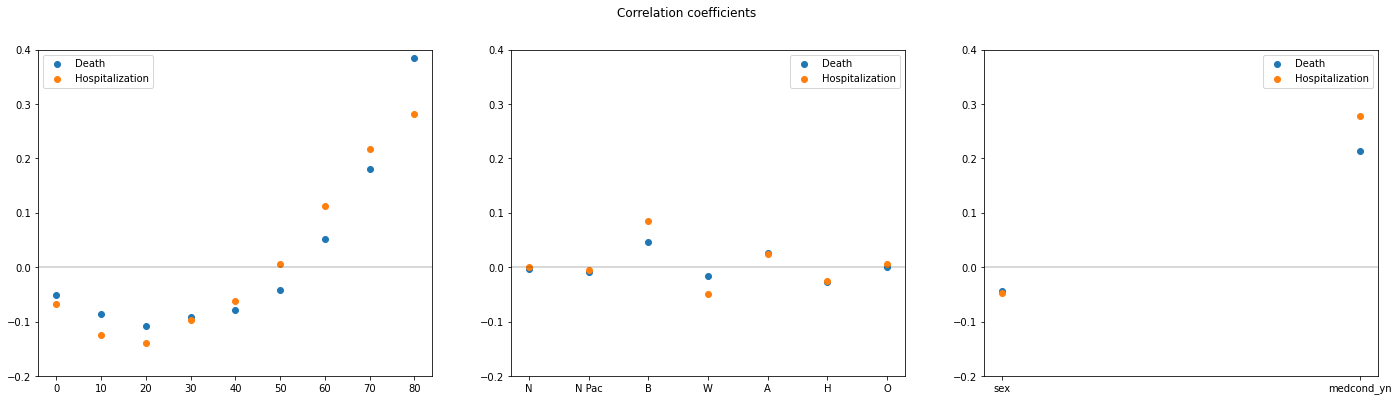

In [91]:
fig, (ax_age, ax_race, ax_misc) = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Correlation coefficients')

ylim = (-0.2, 0.4)

ax_age.scatter(np.arange(9) * 10, correlation_coefficients_death_age, label='Death')
ax_age.scatter(np.arange(9) * 10, correlation_coefficients_hosp_age, label='Hospitalization')
ax_age.legend(); ax_age.axhline(0, color='black', alpha=0.2); ax_age.set_ylim(ylim);

ax_race.scatter(range(len(correlation_coefficients_death_race)), correlation_coefficients_death_race, label='Death')
ax_race.scatter(range(len(correlation_coefficients_hosp_race)), correlation_coefficients_hosp_race, label='Hospitalization')
ax_race.set_xticks(range(7))
ax_race.set_xticklabels(['N', 'N Pac', 'B', 'W', 'A', 'H', 'O']);
ax_race.legend(); ax_race.axhline(0, color='black', alpha=0.2); ax_race.set_ylim(ylim);

ax_misc.scatter(range(len(correlation_coefficients_death_misc)), correlation_coefficients_death_misc, label='Death')
ax_misc.scatter(range(len(correlation_coefficients_hosp_misc)), correlation_coefficients_hosp_misc, label='Hospitalization')
ax_misc.set_xticks(range(2))
ax_misc.set_xticklabels(['sex', 'medcond_yn']);
ax_misc.legend(); ax_misc.axhline(0, color='black', alpha=0.2); ax_misc.set_ylim(ylim);